# Demonstrates different methods to crop the remote sensing data

In [1]:
import sys
sys.path.append('/home/jovyan/intake-aodn')
import intake_aodn
import intake

In [2]:
from intake_aodn.utils import get_local_cluster
client = get_local_cluster()
client

<Client: 'tcp://127.0.0.1:8786' processes=8 threads=32, memory=28.00 GiB>

## 1. Select a single point

In [3]:
ds=intake_aodn.cat.aodn_s3.SST_L3S_1d_ngt(startdt='2021-01-01',
                                          enddt='2021-03-01',
                                          cropto=dict(latitude=-32.,longitude=115.,method='nearest')).read()
ds

<xarray.Dataset>
Dimensions:                  (time: 58)
Coordinates:
    latitude                 float32 -32.01
    longitude                float32 115.0
  * time                     (time) datetime64[ns] 2021-01-01T15:20:00 ... 20...
Data variables:
    dt_analysis              (time) float32 nan 0.4487 -0.5513 ... nan nan
    l2p_flags                (time) float32 nan 9.216e+03 8.192e+03 ... nan nan
    quality_level            (time) float32 nan 2.0 2.0 5.0 ... 5.0 5.0 nan nan
    satellite_zenith_angle   (time) float32 nan 67.63 40.47 ... 25.64 nan nan
    sea_surface_temperature  (time) float32 nan 295.0 294.2 ... 295.9 nan nan
    sses_bias                (time) float32 nan -0.9479 -0.4401 ... nan nan
    sses_count               (time) float32 nan 1.08 1.062 ... 3.659 nan nan
    sses_standard_deviation  (time) float32 nan 0.8542 0.6319 ... nan nan
    sst_dtime                (time) float64 nan -6.709e+03 -535.8 ... nan nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

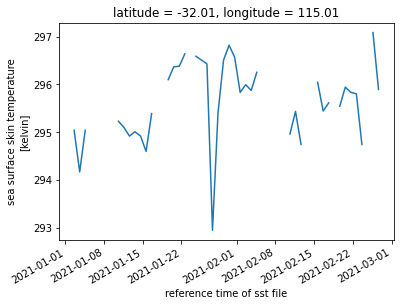

In [4]:
ds.sea_surface_temperature.plot()

## 2. Select a list of points

In [5]:
ds=intake_aodn.cat.aodn_s3.SST_L3S_1d_ngt(startdt='2021-01-01',
                                          enddt='2021-03-01',
                                          cropto=dict(latitude=[-32., -33., -34., -35.],longitude=[115., 115., 115., 115.],method='nearest')).read()
ds

<xarray.Dataset>
Dimensions:                  (time: 58, points: 4)
Coordinates:
    latitude                 (points) float32 -32.01 -32.99 -33.99 -34.99
    longitude                (points) float32 115.0 115.0 115.0 115.0
  * time                     (time) datetime64[ns] 2021-01-01T15:20:00 ... 20...
Dimensions without coordinates: points
Data variables:
    dt_analysis              (time, points) float32 nan nan nan ... nan nan nan
    l2p_flags                (time, points) float32 nan nan 2.0 ... nan 2.0 nan
    quality_level            (time, points) float32 nan nan nan ... nan nan nan
    satellite_zenith_angle   (time, points) float32 nan nan nan ... nan nan nan
    sea_surface_temperature  (time, points) float32 nan nan nan ... nan nan nan
    sses_bias                (time, points) float32 nan nan nan ... nan nan nan
    sses_count               (time, points) float32 nan nan nan ... nan nan nan
    sses_standard_deviation  (time, points) float32 nan nan nan ... nan nan nan
    sst_dtime                (time, points) float64 nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

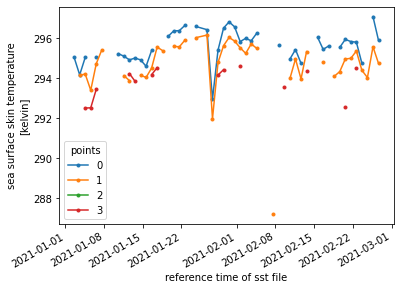

In [6]:
ds.sea_surface_temperature.plot(hue='points',marker='.')

## 3. Select a rectangular area

In [7]:
ds=intake_aodn.cat.aodn_s3.SST_L3S_1d_ngt(startdt='2021-01-01',
                                          enddt='2021-03-01',
                                          cropto=dict(latitude=slice(-32.,-33.),longitude=slice(115,116))).read()
ds

<xarray.Dataset>
Dimensions:                  (time: 58, latitude: 50, longitude: 50)
Coordinates:
  * latitude                 (latitude) float32 -32.01 -32.03 ... -32.97 -32.99
  * longitude                (longitude) float32 115.0 115.0 ... 116.0 116.0
  * time                     (time) datetime64[ns] 2021-01-01T15:20:00 ... 20...
Data variables:
    dt_analysis              (time, latitude, longitude) float32 nan nan ... nan
    l2p_flags                (time, latitude, longitude) float32 nan nan ... 2.0
    quality_level            (time, latitude, longitude) float32 nan nan ... nan
    satellite_zenith_angle   (time, latitude, longitude) float32 nan nan ... nan
    sea_surface_temperature  (time, latitude, longitude) float32 nan nan ... nan
    sses_bias                (time, latitude, longitude) float32 nan nan ... nan
    sses_count               (time, latitude, longitude) float32 nan nan ... nan
    sses_standard_deviation  (time, latitude, longitude) float32 nan nan ... nan
    sst_dtime                (time, latitude, longitude) float64 nan nan ... nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

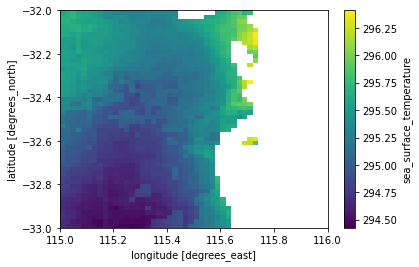

In [8]:
ds.sea_surface_temperature.mean(dim='time').plot()

## 4. Pass in a geometry

In [9]:
import fiona # A library for lots of geospatial analysis
import geopandas as gpd # A library for opening shapefiles (and the like) and displaying their attribues and geometry
import matplotlib.pyplot as plt # A general purpose plotting library
import cartopy.crs as ccrs # Library for plotting maps in python
import cartopy.feature as cf # Library for plotting maps in python

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #adds support for reading KML to geopandas
gdf = gpd.read_file('SharkBay.kml', driver='KML')
gdf

,Name,Description,geometry
0,SharkBay,,"POLYGON Z ((113.61460 -24.56049 0.00000, 113.4..."


In [10]:
ds=intake_aodn.cat.aodn_s3.SST_L3S_1d_ngt(startdt='2021-01-01',
                                             enddt='2021-03-01',
                                             geom=str(gdf.geometry[0])).read() # Geometry string in WKT
ds

<xarray.Dataset>
Dimensions:                  (time: 58, latitude: 114, longitude: 84)
Coordinates:
  * latitude                 (latitude) float32 -24.49 -24.51 ... -26.73 -26.75
  * longitude                (longitude) float32 112.8 112.8 ... 114.5 114.5
  * time                     (time) datetime64[ns] 2021-01-01T15:20:00 ... 20...
Data variables:
    dt_analysis              (time, latitude, longitude) float32 0.2487 ... nan
    l2p_flags                (time, latitude, longitude) float32 9.216e+03 .....
    quality_level            (time, latitude, longitude) float32 5.0 5.0 ... nan
    satellite_zenith_angle   (time, latitude, longitude) float32 62.7 ... nan
    sea_surface_temperature  (time, latitude, longitude) float32 299.1 ... nan
    sses_bias                (time, latitude, longitude) float32 0.2824 ... nan
    sses_count               (time, latitude, longitude) float32 3.373 ... nan
    sses_standard_deviation  (time, latitude, longitude) float32 0.2872 ... nan
    sst_dtime                (time, latitude, longitude) float64 -476.2 ... nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

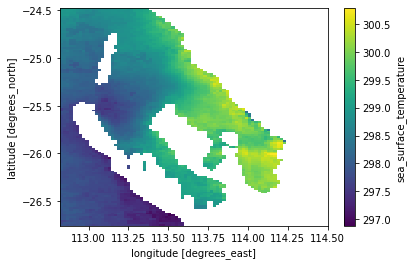

In [11]:
ds.sea_surface_temperature.mean(dim='time').plot()